In [1]:
using LinearAlgebra, Plots

@inline function get_y(t)
    return exp(t.^5)
end

@inline function get_dy(t, y)
    return 5*(t.^4).*y
end

function RK(odefun, tList, y0)
    h = tList[2] - tList[1]
    y = zeros(length(y0), length(tList))
    y[:, 1] = deepcopy(y0)
    for num = 2:length(tList)
        k1 = odefun(tList[num - 1], y[:, num - 1]);
        k2 = odefun(tList[num - 1] + h/2, y[:, num - 1] + h*k1/2);
        k3 = odefun(tList[num - 1] + h/2, y[:, num - 1] + h*k2/2);
        k4 = odefun(tList[num - 1] + h, y[:, num - 1] + h*k3);
        y[:, num] = y[:, num - 1] + h/6*(k1 + 2*k2 + 2*k3 + k4);
    end
    return y
end

RK (generic function with 1 method)

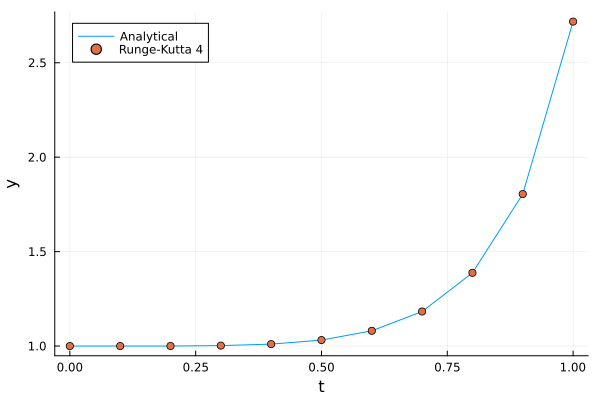

In [4]:
h = 0.1
tList = collect(0:h:1)
y_ana = zeros(1, length(tList))
for num = 1:length(tList)
    y_ana[num] = get_y(tList[num])
end
y_rk = deepcopy(tList)
y0 = [1]
y_rk = RK(get_dy, tList, y0)

# 作图
plot(tList, y_ana', label="Analytical")
scatter!(tList, y_rk', label="Runge-Kutta 4")
xlabel!("t")
ylabel!("y")